In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

ModuleNotFoundError: No module named 'keras'

In [5]:
import keras

ModuleNotFoundError: No module named 'keras'

In [45]:
train=pd.read_csv("D:/kannada-MNIst/train.csv")
test=pd.read_csv("D:/kannada-MNIst/test.csv")

In [47]:
X_train=train.drop('label',axis=1)
Y_train=train.label

In [48]:
X_train=X_train/255
test=test/255


In [49]:
test=test.drop('id',axis=1)

In [50]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

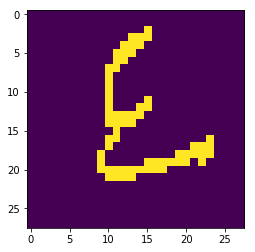

In [56]:
plt.imshow(X_train[56666][:,:,0])